In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de TO 

In [2]:
gdf = gpd.read_file('Shapes/TO/17SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 14 columns):
ID            2115 non-null int64
CD_GEOCODI    2115 non-null object
TIPO          2115 non-null object
CD_GEOCODB    0 non-null object
NM_BAIRRO     0 non-null object
CD_GEOCODS    2115 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    2115 non-null object
NM_DISTRIT    2115 non-null object
CD_GEOCODM    2115 non-null object
NM_MUNICIP    2115 non-null object
NM_MICRO      2115 non-null object
NM_MESO       2115 non-null object
geometry      2115 non-null object
dtypes: int64(1), object(13)
memory usage: 231.4+ KB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para TO

In [4]:
dados = pd.read_csv('Planilhas/TO/CSV/Basico_TO.csv',sep =';')

In [5]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(2089, 13)

In [6]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,170025105000001,244.0,778.0,"3,19","2,4","806,54","4010335,67","1009,21","4817667,38","523,16","2058702,72","861,83","3102307,34"
1,170025105000002,115.0,300.0,"2,61","1,87","648,06","973810,51","866,59","1114445,33","431,2","632388,52","717,7","848395,08"
2,170025105000003,59.0,167.0,"2,83","2,73","433,73","268023,79","595,12","271797,01","299,05","180862,25","521,32","199666,22"
3,170025105000004,141.0,448.0,"3,18","3,2","370,51","242088,72","555,77","260368,96","219,33","143551,69","462,27","190546,86"
4,170025105000005,201.0,698.0,"3,47","2,69","476,95","253956,17","626,58","239781,68","291,42","218362,76","576,55","267800,54"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [7]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [8]:
to = pd.merge(gdf,dados, on='CD_GEOCODI')

In [9]:
to.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 26 columns):
ID            2089 non-null int64
CD_GEOCODI    2089 non-null int64
TIPO          2089 non-null object
CD_GEOCODB    0 non-null object
NM_BAIRRO     0 non-null object
CD_GEOCODS    2089 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    2089 non-null object
NM_DISTRIT    2089 non-null object
CD_GEOCODM    2089 non-null object
NM_MUNICIP    2089 non-null object
NM_MICRO      2089 non-null object
NM_MESO       2089 non-null object
geometry      2089 non-null object
V001          2086 non-null float64
V002          2086 non-null float64
V003          2086 non-null object
V004          2086 non-null object
V005          2086 non-null object
V006          2086 non-null object
V007          2081 non-null object
V008          2081 non-null object
V009          2088 non-null object
V010          2088 non-null object
V011          2087 non-null object
V012          2087 

In [10]:
del gdf
del dados

Text(0.5,1,'TOCANTINS - TO')

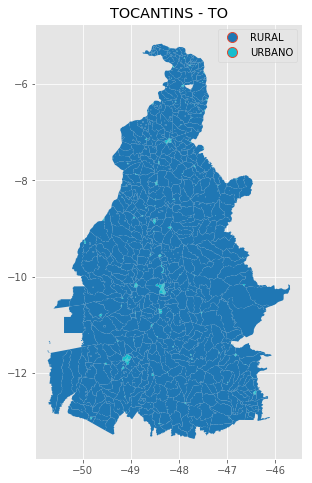

In [17]:
plt.style.use('ggplot')
to.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('TOCANTINS - TO')

# Utilizando a projeção de Albers para calcular as áreas

In [11]:
to['AREA'] = to.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [12]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [13]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [14]:
areas_urbanas_to_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='TO']
del areas_urbanas_br_15

In [15]:
areas_urbanas_to_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
0,AbreulÃ¢ndia,TO,1.186,1700251.0,POLYGON ((-49.15279450701928 -9.61724628582055...,1.186455
1,AguiarnÃ³polis,TO,3.678,1700301.0,(POLYGON ((-47.49816213259801 -6.5578510199323...,3.677605
2,AlianÃ§a do Tocantins,TO,4.443,1700350.0,POLYGON ((-48.94606779753597 -11.3144642282843...,4.442485
3,Almas,TO,4.602,1700400.0,POLYGON ((-47.16895218318805 -11.5595894869832...,4.602092
4,Alvorada,TO,5.055,1700707.0,POLYGON ((-49.13181395986814 -12.4690675080750...,5.054604


In [16]:
areas_urbanas_to_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_to_15['CD_GEOCODM']=areas_urbanas_to_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_to_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 139 entries, 0 to 146
Data columns (total 6 columns):
Municipio     139 non-null object
UF            139 non-null object
Area_Urb      139 non-null float64
CD_GEOCODM    139 non-null int64
geometry      139 non-null object
Area          139 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.6+ KB


In [17]:
to.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

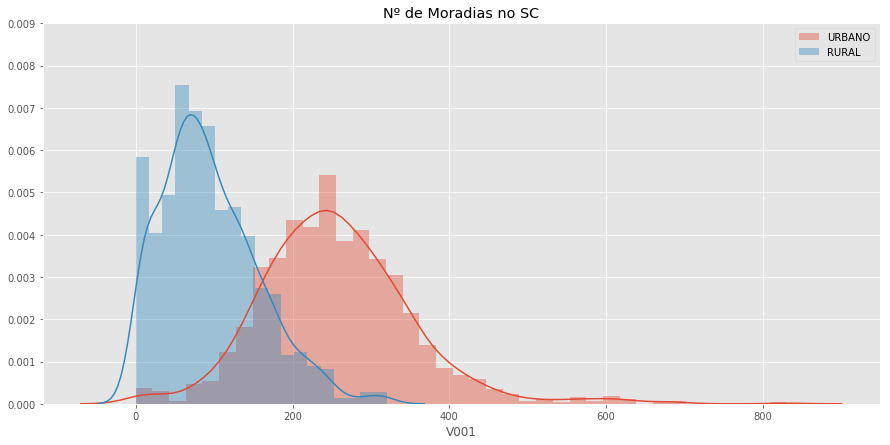

In [18]:
plt.style.use('ggplot')
to['V001'] = pd.to_numeric(to['V001'])
to['V002'] = pd.to_numeric(to['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(to[to['TIPO'] =='URBANO']['V001'])
sns.distplot(to[to['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.009))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [31]:
print('RURAL','\n',to[to['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',to[to['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    866.000000
mean      94.538106
std       62.009931
min        0.000000
25%       51.000000
50%       86.000000
75%      132.000000
max      320.000000
Name: V001, dtype: float64
URBANO 
 count    1223.000000
mean      255.324612
std        97.214175
min         0.000000
25%       194.000000
50%       249.000000
75%       309.000000
max       830.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Area no SC- Rural e URBANO Embrapa')

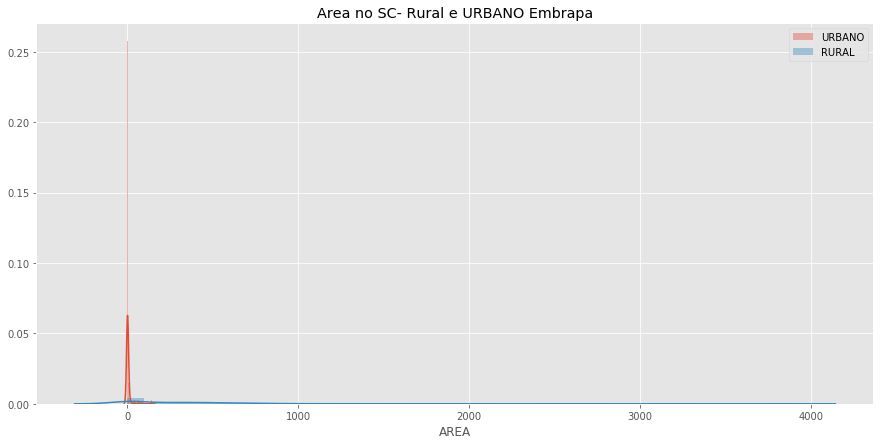

In [33]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_to_15['Area'])
plt.legend(['URBANO'])
sns.distplot(to[to['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')

## Descrição da área por setor censitários urbanos e rurais

In [34]:
print('URBANO','\n',areas_urbanas_to_15['Area'].describe())
print('RURAL','\n',to[to['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    139.000000
mean       5.100219
std       15.280624
min        0.419258
25%        1.215408
50%        1.721370
75%        3.363207
max      144.429587
Name: Area, dtype: float64
RURAL 
 count     866.000000
mean      309.754896
std       397.627147
min         0.066928
25%         3.581323
50%       222.548590
75%       488.957645
max      3834.852824
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.0027)

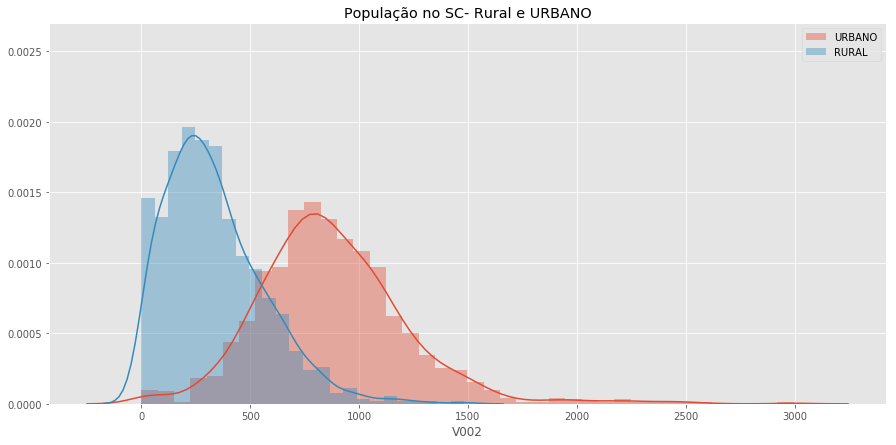

In [35]:
fig = plt.figure(figsize = (15,7))

sns.distplot(to[to['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(to[to['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.0027))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [36]:
print('RURAL','\n',to[to['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',to[to['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count     866.000000
mean      336.651270
std       228.144029
min         0.000000
25%       170.000000
50%       299.000000
75%       468.000000
max      1483.000000
Name: V002, dtype: float64
URBANO 
 count    1223.000000
mean      875.211774
std       344.880003
min         0.000000
25%       659.500000
50%       840.000000
75%      1061.000000
max      2995.000000
Name: V002, dtype: float64


In [19]:
to['Densidade Moradias'] = to.V001/to.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

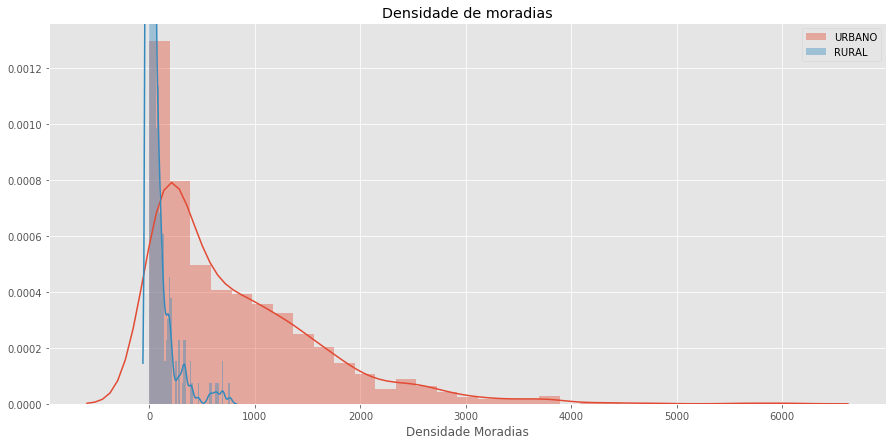

In [20]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(to[to['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(to[to['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')

In [21]:
print('RURAL','\n',to[to['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',to[to['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    866.000000
mean      25.768771
std       79.910220
min        0.000000
25%        0.197465
50%        0.477919
75%        8.729480
max      762.015711
Name: Densidade Moradias, dtype: float64
URBANO 
 count    1223.000000
mean      828.251334
std       818.508822
min         0.000000
25%       194.135434
50%       569.995386
75%      1243.237758
max      6031.217245
Name: Densidade Moradias, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [22]:
max_area = areas_urbanas_to_15['Area'].mean() + areas_urbanas_to_15['Area'].std() 
min_pop =  to[to['TIPO']=='URBANO']['V002'].mean()
min_mor =  to[to['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = to[to['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [23]:
scrcu = to[(to.TIPO=='RURAL')&(to.V001 >= min_mor)&(to.AREA <= max_area)&(to.V002>= min_pop)&(to['Densidade Moradias']>= min_densidade_moradias)]

In [24]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizando as areas urbanas no estado de TO - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


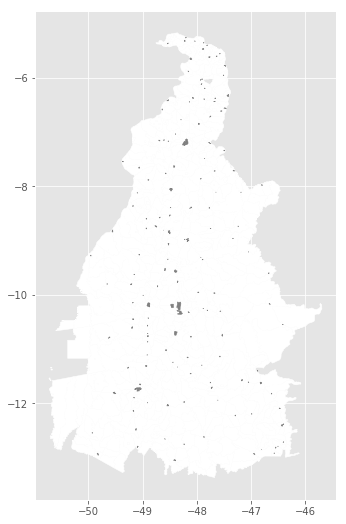

In [25]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
to.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_to_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [26]:
areas_urbanas_to_15.rename(columns={'Area':'AREA'},inplace = True)

In [27]:
fonte = np.zeros(areas_urbanas_to_15.shape[0])
areas_urbanas_to_15['FONTE'] = fonte

In [28]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

In [29]:
regioes_urbanas_to = scrcu[['geometry','FONTE']].append(areas_urbanas_to_15[['geometry','FONTE']])

In [30]:
regioes_urbanas_to.head()

,geometry,FONTE
0,POLYGON ((-49.15279450701928 -9.61724628582055...,0.0
1,(POLYGON ((-47.49816213259801 -6.5578510199323...,0.0
2,POLYGON ((-48.94606779753597 -11.3144642282843...,0.0
3,POLYGON ((-47.16895218318805 -11.5595894869832...,0.0
4,POLYGON ((-49.13181395986814 -12.4690675080750...,0.0


In [31]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_to['FONTE'] = regioes_urbanas_to['FONTE'].apply(fonte) 

In [32]:
regioes_urbanas_to.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_to.shp')

In [34]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_to[regioes_urbanas_to['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_to[regioes_urbanas_to['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_to.crs)

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
